In [2]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

In [3]:
start_date = datetime(2017, 1, 1)
end_date = datetime(2023, 12, 31)
num_days = (end_date - start_date).days + 1
dates = [start_date + timedelta(days=i) for i in range(num_days)]

num_entries = len(dates)

# 0 - 5 (meters)
tidal_variation = np.random.uniform(0, 5, num_entries)

# 0 - 3
waves = np.random.uniform(0, 3, num_entries)

current_speed = np.random.uniform(0.1, 2.5, num_entries)

direction_of_flow = np.random.randint(0, 2, num_entries)

dredging_requirement = []
for speed, direction in zip(current_speed, direction_of_flow):
    if direction == 0:
        dredging_requirement.append('Medium' if speed > 1 else 'Low')
    else:
        dredging_requirement.append('High' if speed > 1.5 else 'Medium')

# 1- 3 b meter cube
siltation_amount = np.random.uniform(1, 3, num_entries)
depth = [10 - siltation * 2 if dredge_req != 'Low' else np.random.uniform(10, 20) for siltation, dredge_req in zip(siltation_amount, dredging_requirement)]

ships_frequency = np.random.randint(5, 30, num_entries)

heavy_rainfall = np.random.randint(0, 2, num_entries)

data = pd.DataFrame({
    'Date': dates,
    'Tidal_Variation': tidal_variation,
    'Waves': waves,
    'Current_Speed': current_speed,
    'Direction_of_Flow': direction_of_flow,
    'Dredging_Requirement': dredging_requirement,
    'Depth': depth,
    'Siltation_Amount': siltation_amount,
    'Ships_Frequency': ships_frequency,
    'Heavy_Rainfall': heavy_rainfall
})


In [4]:
data = data.round(2)

In [5]:
data.head()

Date  Tidal_Variation  Waves  Current_Speed  Direction_of_Flow  \
0 2017-01-01             0.47   1.38           1.36                  0   
1 2017-01-02             1.56   2.21           0.28                  0   
2 2017-01-03             2.02   0.69           0.55                  0   
3 2017-01-04             2.28   0.25           2.03                  1   
4 2017-01-05             4.04   1.37           1.05                  1   

  Dredging_Requirement  Depth  Siltation_Amount  Ships_Frequency  \
0               Medium   5.91              2.04               26   
1                  Low  15.25              2.27               11   
2                  Low  11.39              1.35               11   
3                 High   6.47              1.76               24   
4               Medium   6.74              1.63               17   

   Heavy_Rainfall  
0               0  
1               0  
2               1  
3               1  
4               0

In [6]:
data.shape

(2556, 10)

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

start_date = datetime(2017, 1, 1)
end_date = datetime(2023, 12, 31)
num_days = (end_date - start_date).days + 1
dates = [start_date + timedelta(days=i) for i in range(num_days)]

num_entries = len(dates)

tidal_variation = np.random.uniform(0, 5, num_entries)
waves = np.random.uniform(0, 3, num_entries)
current_speed = np.random.uniform(0.1, 2.5, num_entries)
direction_of_flow = np.random.randint(0, 2, num_entries)

dredging_requirement = []
for speed, direction in zip(current_speed, direction_of_flow):
    if direction == 0:
        dredging_requirement.append('Medium' if speed > 1 else 'Low')
    else:
        dredging_requirement.append('High' if speed > 1.5 else 'Medium')


siltation_amount = np.random.uniform(1, 3, num_entries)
depth = []
for siltation, dredge_req in zip(siltation_amount, dredging_requirement):
    if siltation > 2:
        depth.append(np.random.uniform(8, 12))  # Decrease depth if siltation is high
    else:
        depth.append(np.random.uniform(12, 20))  # Increase depth if siltation is low

ships_frequency = np.random.randint(5, 30, num_entries)
heavy_rainfall = np.random.randint(0, 2, num_entries)

data = pd.DataFrame({
    'Date': dates,
    'Tidal_Variation': tidal_variation,
    'Waves': waves,
    'Current_Speed': current_speed,
    'Direction_of_Flow': direction_of_flow,
    'Dredging_Requirement': dredging_requirement,
    'Depth': depth,
    'Siltation_Amount': siltation_amount,
    'Ships_Frequency': ships_frequency,
    'Heavy_Rainfall': heavy_rainfall
})


In [9]:
data = data.round(2)

In [10]:
data.head()

Date  Tidal_Variation  Waves  Current_Speed  Direction_of_Flow  \
0 2017-01-01             2.66   0.01           1.29                  1   
1 2017-01-02             3.23   0.34           2.11                  0   
2 2017-01-03             2.19   2.88           0.50                  0   
3 2017-01-04             0.07   1.23           2.09                  0   
4 2017-01-05             4.45   2.11           1.02                  0   

  Dredging_Requirement  Depth  Siltation_Amount  Ships_Frequency  \
0               Medium  14.30              1.98               15   
1               Medium  10.95              2.90                9   
2                  Low  18.66              1.00               12   
3               Medium  11.99              2.64               18   
4               Medium  12.67              1.98               17   

   Heavy_Rainfall  
0               0  
1               1  
2               1  
3               0  
4               0

In [11]:
data.shape

(2556, 10)

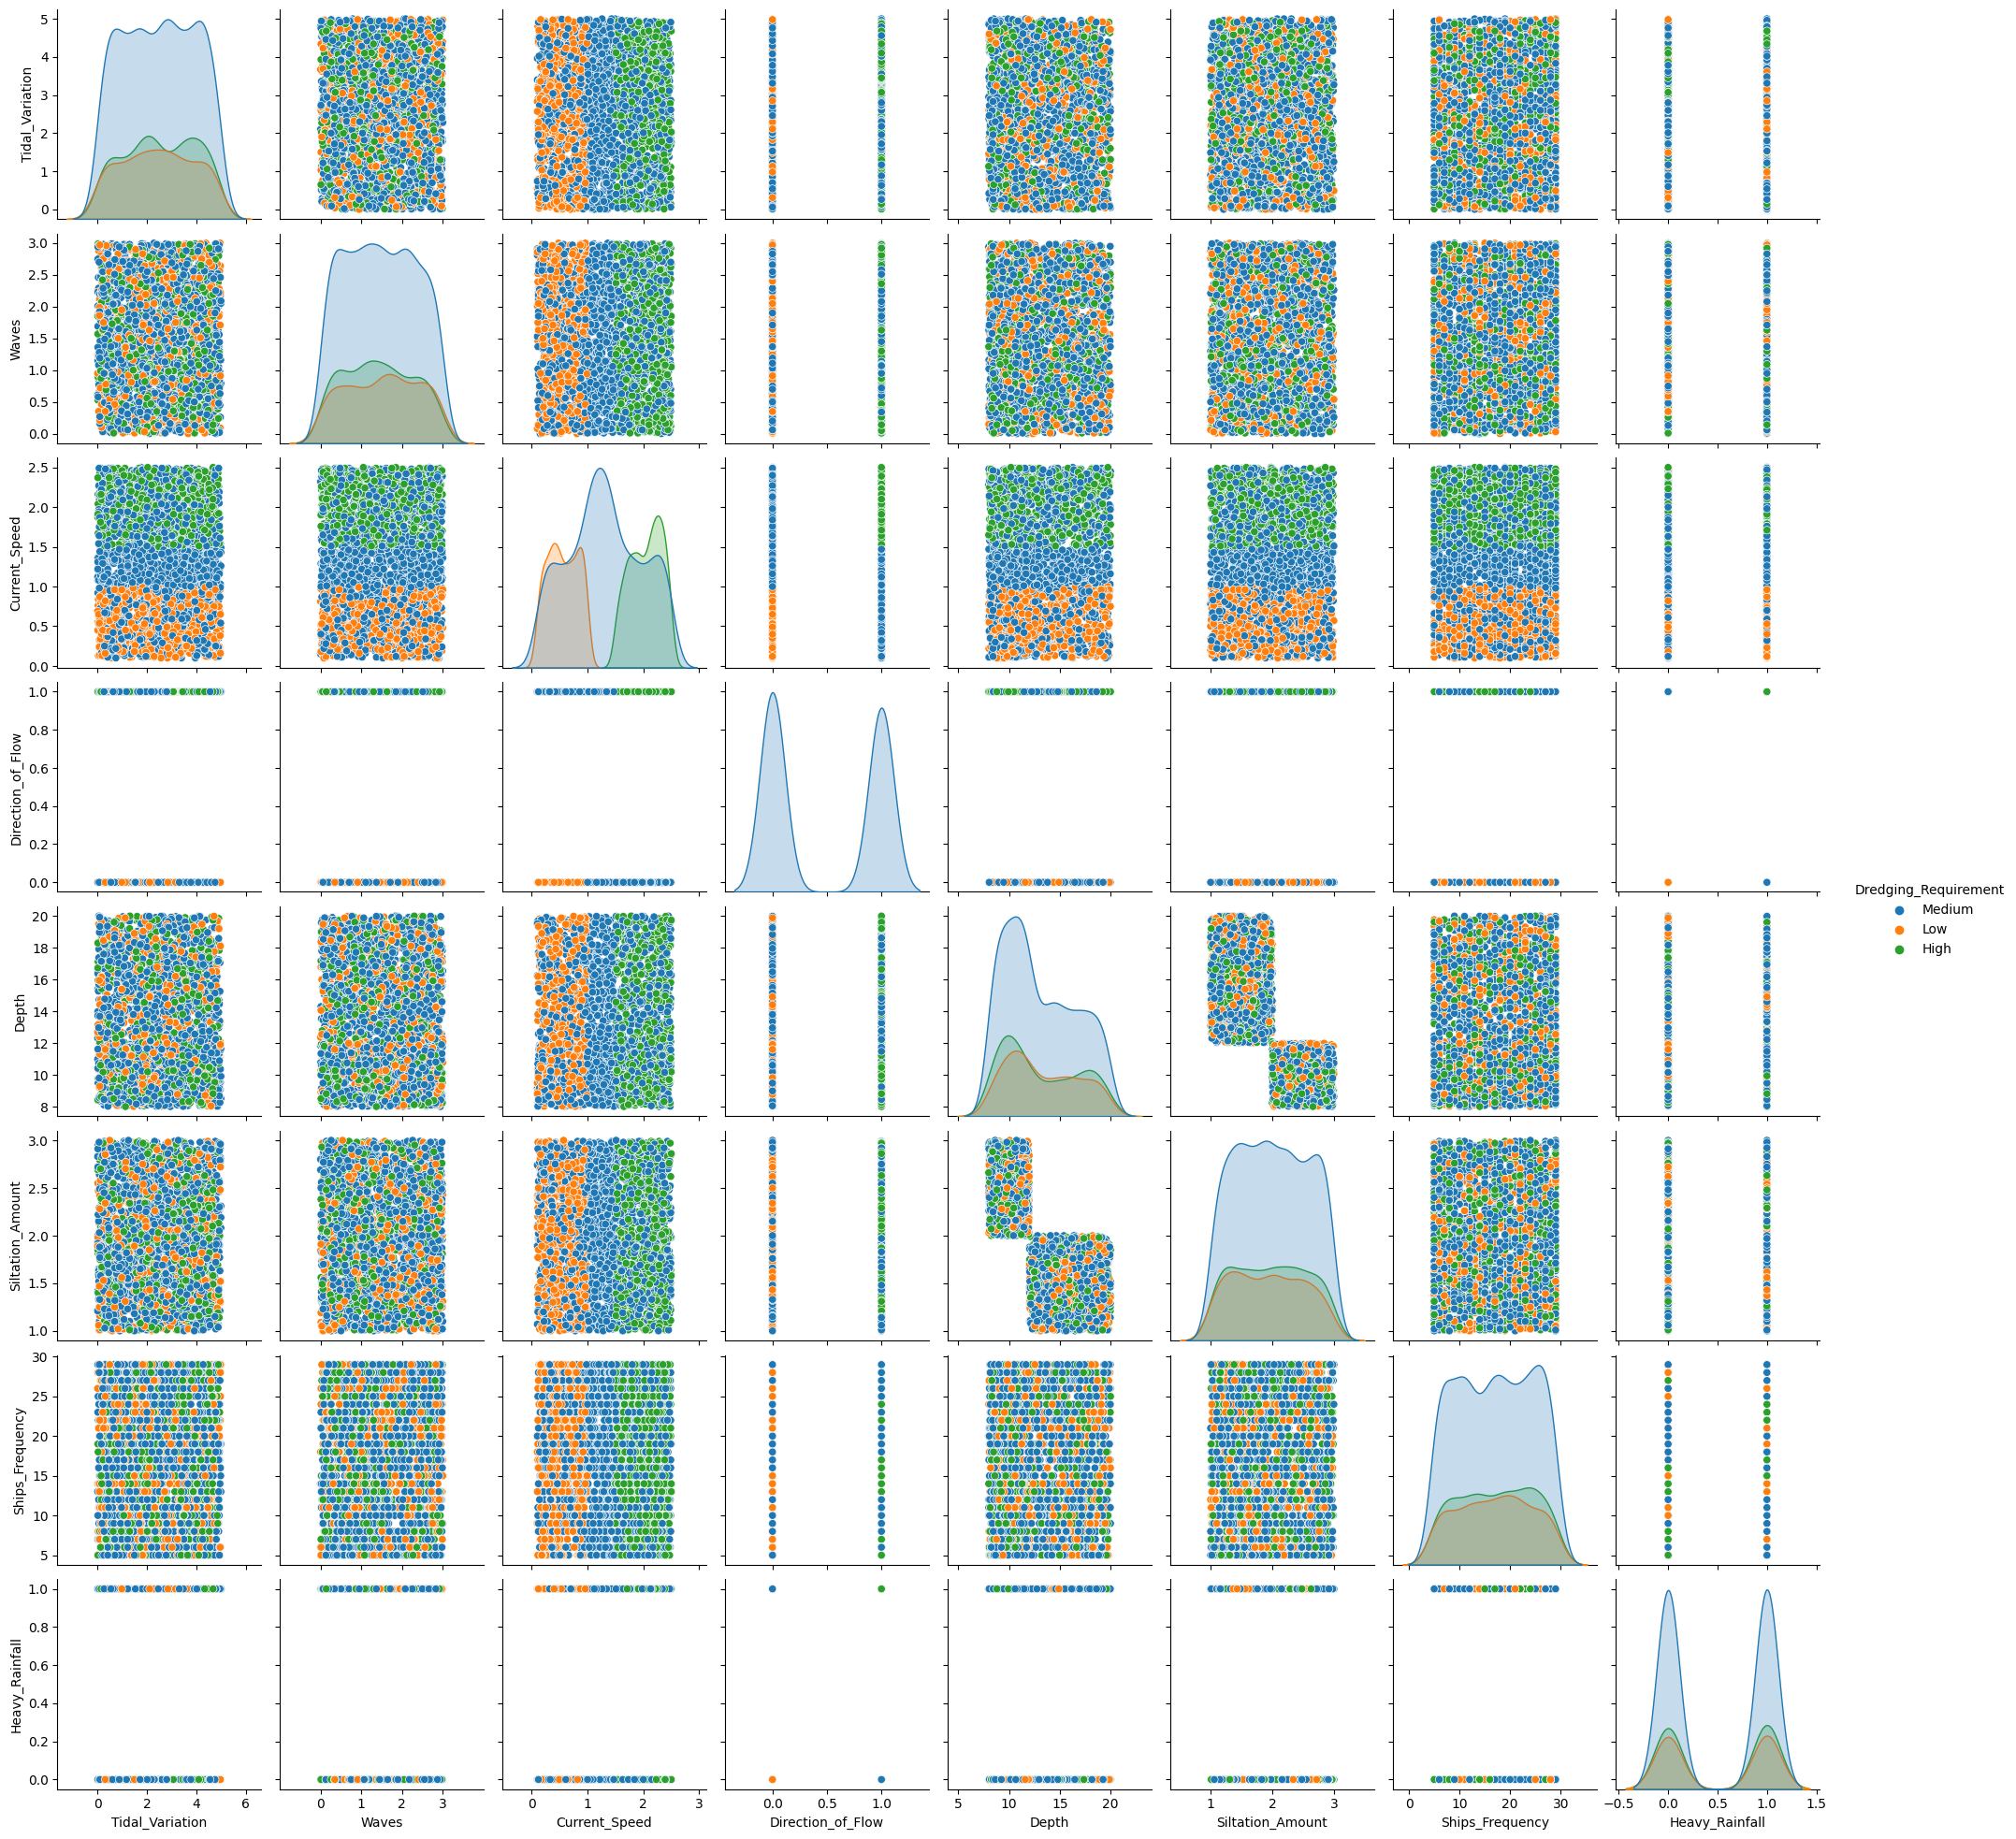

In [12]:
sns.pairplot(data, hue = 'Dredging_Requirement')

In [13]:

dredging_requirement_siltation = []

for siltation in siltation_amount:
    if 0 <= siltation <= 0.7:
        dredging_requirement_siltation.append('Low')
    elif 0.8 <= siltation <= 1.8:
        dredging_requirement_siltation.append('Medium')
    else:
        dredging_requirement_siltation.append('High')

data['Dredging_Requirement'] = np.where(data['Siltation_Amount'] == siltation_amount, dredging_requirement_siltation, data['Dredging_Requirement'])


In [15]:
data.head()

Date  Tidal_Variation  Waves  Current_Speed  Direction_of_Flow  \
0 2017-01-01             2.66   0.01           1.29                  1   
1 2017-01-02             3.23   0.34           2.11                  0   
2 2017-01-03             2.19   2.88           0.50                  0   
3 2017-01-04             0.07   1.23           2.09                  0   
4 2017-01-05             4.45   2.11           1.02                  0   

  Dredging_Requirement  Depth  Siltation_Amount  Ships_Frequency  \
0               Medium  14.30              1.98               15   
1               Medium  10.95              2.90                9   
2                  Low  18.66              1.00               12   
3               Medium  11.99              2.64               18   
4               Medium  12.67              1.98               17   

   Heavy_Rainfall  
0               0  
1               1  
2               1  
3               0  
4               0

In [16]:
data['Channel'] = np.random.choice([1, 2], size=len(data))

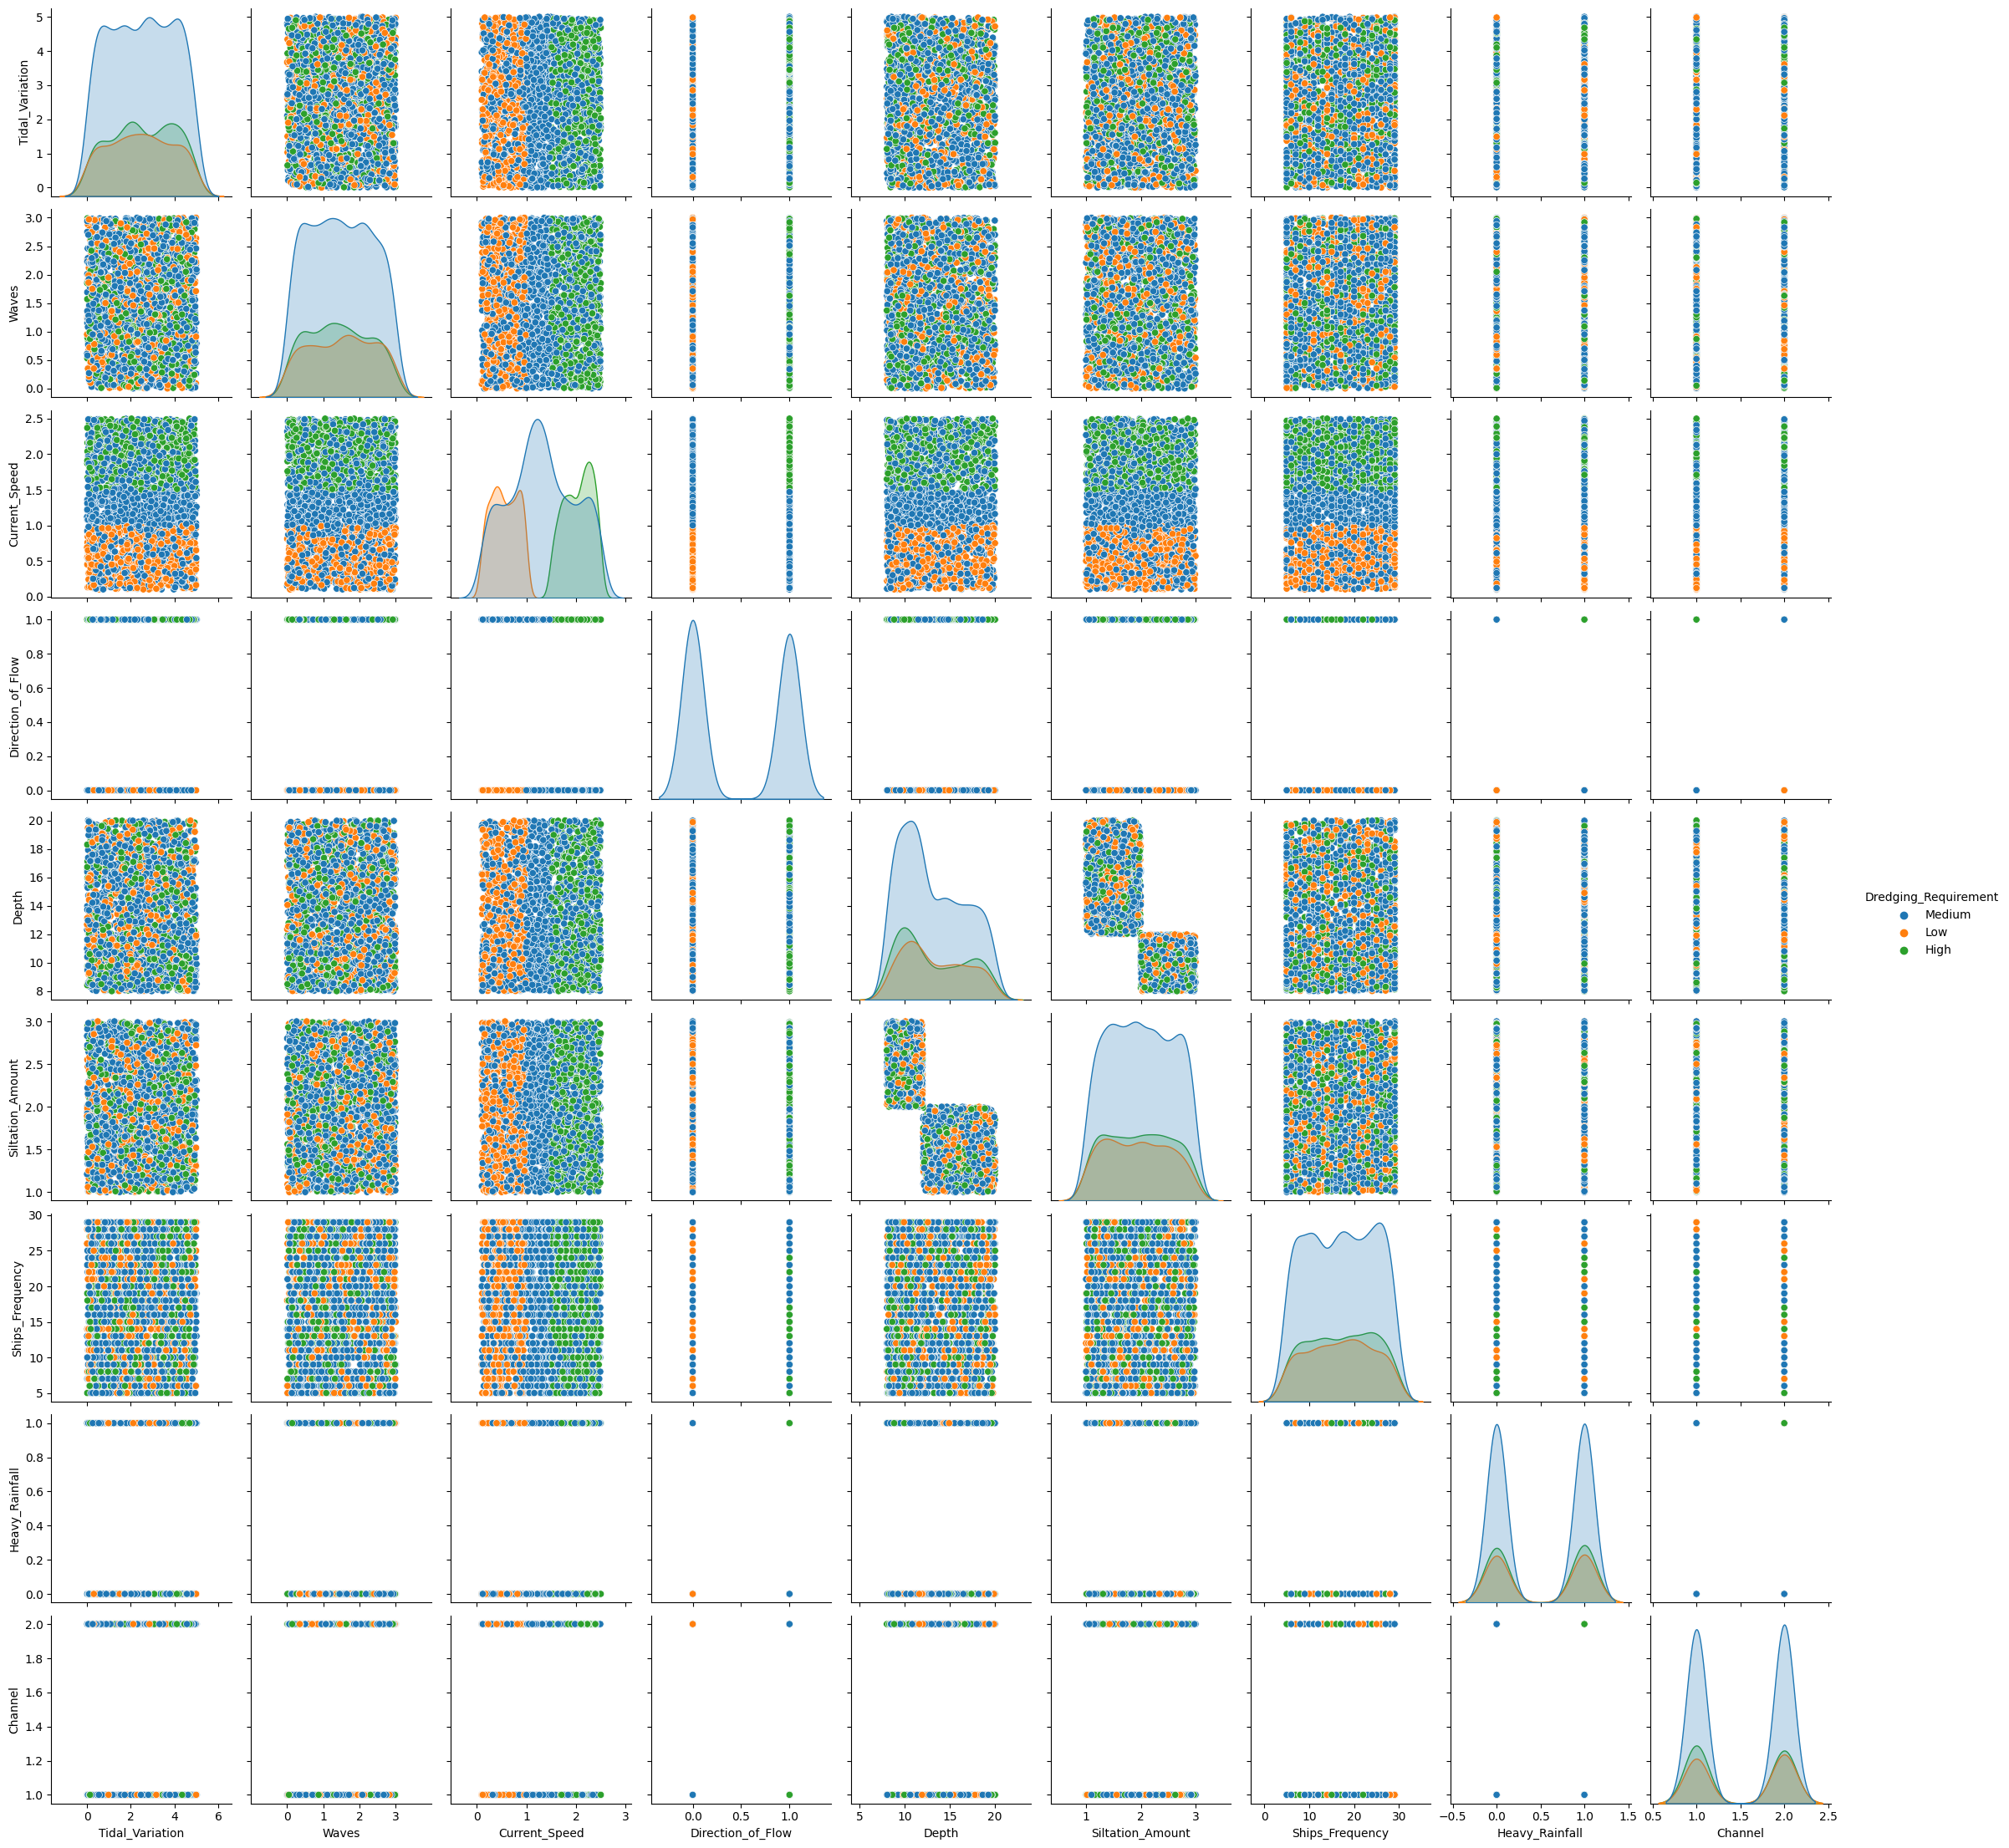

In [17]:
sns.pairplot(data, hue = 'Dredging_Requirement')

In [18]:
data.to_csv("Final_data_Dredging.csv")

In [19]:
data.head()

Date  Tidal_Variation  Waves  Current_Speed  Direction_of_Flow  \
0 2017-01-01             2.66   0.01           1.29                  1   
1 2017-01-02             3.23   0.34           2.11                  0   
2 2017-01-03             2.19   2.88           0.50                  0   
3 2017-01-04             0.07   1.23           2.09                  0   
4 2017-01-05             4.45   2.11           1.02                  0   

  Dredging_Requirement  Depth  Siltation_Amount  Ships_Frequency  \
0               Medium  14.30              1.98               15   
1               Medium  10.95              2.90                9   
2                  Low  18.66              1.00               12   
3               Medium  11.99              2.64               18   
4               Medium  12.67              1.98               17   

   Heavy_Rainfall  Channel  
0               0        1  
1               1        2  
2               1        1  
3               0        1  
4               0        2

## Relation Graphs

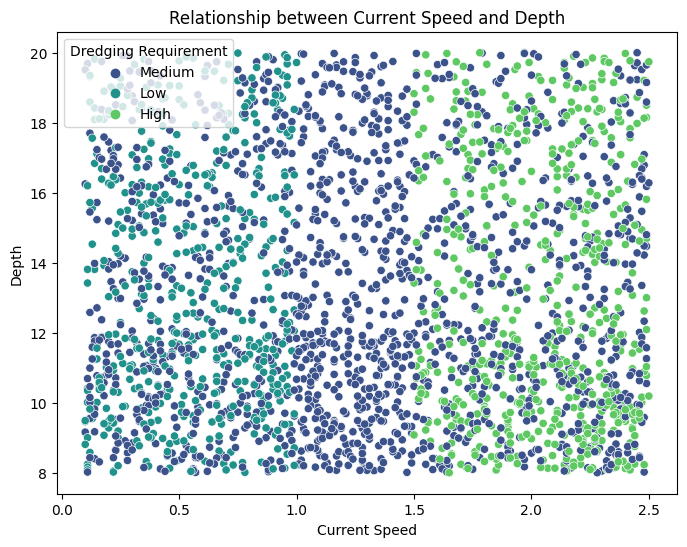

In [20]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Current_Speed', y='Depth', hue='Dredging_Requirement', palette='viridis')
plt.title('Relationship between Current Speed and Depth')
plt.xlabel('Current Speed')
plt.ylabel('Depth')
plt.legend(title='Dredging Requirement', loc='best')
plt.show()

In [21]:
data.head()

Date  Tidal_Variation  Waves  Current_Speed  Direction_of_Flow  \
0 2017-01-01             2.66   0.01           1.29                  1   
1 2017-01-02             3.23   0.34           2.11                  0   
2 2017-01-03             2.19   2.88           0.50                  0   
3 2017-01-04             0.07   1.23           2.09                  0   
4 2017-01-05             4.45   2.11           1.02                  0   

  Dredging_Requirement  Depth  Siltation_Amount  Ships_Frequency  \
0               Medium  14.30              1.98               15   
1               Medium  10.95              2.90                9   
2                  Low  18.66              1.00               12   
3               Medium  11.99              2.64               18   
4               Medium  12.67              1.98               17   

   Heavy_Rainfall  Channel  
0               0        1  
1               1        2  
2               1        1  
3               0        1  
4               0        2

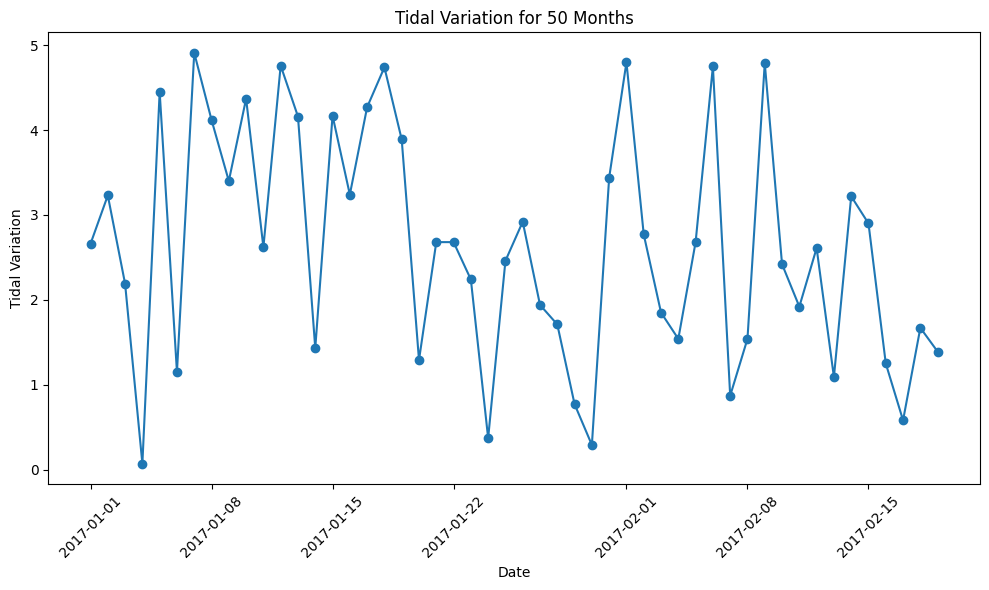

In [22]:
data_subset = data.head(50)

plt.figure(figsize=(10, 6))
plt.plot(data_subset['Date'], data_subset['Tidal_Variation'], marker='o', linestyle='-')
plt.title('Tidal Variation for 50 Months')
plt.xlabel('Date')
plt.ylabel('Tidal Variation')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [23]:
data.describe()

Tidal_Variation        Waves  Current_Speed  Direction_of_Flow  \
count      2556.000000  2556.000000    2556.000000        2556.000000   
mean          2.494049     1.473725       1.322285           0.502739   
std           1.438951     0.859493       0.712216           0.500090   
min           0.000000     0.000000       0.100000           0.000000   
25%           1.280000     0.740000       0.710000           0.000000   
50%           2.500000     1.480000       1.310000           1.000000   
75%           3.740000     2.210000       1.952500           1.000000   
max           5.000000     3.000000       2.500000           1.000000   

             Depth  Siltation_Amount  Ships_Frequency  Heavy_Rainfall  \
count  2556.000000       2556.000000      2556.000000     2556.000000   
mean     13.123689          1.981213        17.048513        0.504304   
std       3.520990          0.575959         7.295013        0.500079   
min       8.000000          1.000000         5.000000        0.000000   
25%      10.100000          1.490000        11.000000        0.000000   
50%      12.210000          1.980000        17.000000        1.000000   
75%      16.202500          2.470000        23.000000        1.000000   
max      20.000000          3.000000        29.000000        1.000000   

           Channel  
count  2556.000000  
mean      1.503130  
std       0.500088  
min       1.000000  
25%       1.000000  
50%       2.000000  
75%       2.000000  
max       2.000000

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2556 entries, 0 to 2555
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  2556 non-null   datetime64[ns]
 1   Tidal_Variation       2556 non-null   float64       
 2   Waves                 2556 non-null   float64       
 3   Current_Speed         2556 non-null   float64       
 4   Direction_of_Flow     2556 non-null   int64         
 5   Dredging_Requirement  2556 non-null   object        
 6   Depth                 2556 non-null   float64       
 7   Siltation_Amount      2556 non-null   float64       
 8   Ships_Frequency       2556 non-null   int64         
 9   Heavy_Rainfall        2556 non-null   int64         
 10  Channel               2556 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(4), object(1)
memory usage: 219.8+ KB


In [25]:
from sklearn.preprocessing import LabelEncoder

In [26]:
le = LabelEncoder()

In [27]:
data['Dredging_Requirement'] = le.fit_transform(data['Dredging_Requirement'])

In [28]:
le.classes_

array(['High', 'Low', 'Medium'], dtype=object)

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2556 entries, 0 to 2555
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  2556 non-null   datetime64[ns]
 1   Tidal_Variation       2556 non-null   float64       
 2   Waves                 2556 non-null   float64       
 3   Current_Speed         2556 non-null   float64       
 4   Direction_of_Flow     2556 non-null   int64         
 5   Dredging_Requirement  2556 non-null   int64         
 6   Depth                 2556 non-null   float64       
 7   Siltation_Amount      2556 non-null   float64       
 8   Ships_Frequency       2556 non-null   int64         
 9   Heavy_Rainfall        2556 non-null   int64         
 10  Channel               2556 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(5)
memory usage: 219.8 KB


In [30]:
data.head()

Date  Tidal_Variation  Waves  Current_Speed  Direction_of_Flow  \
0 2017-01-01             2.66   0.01           1.29                  1   
1 2017-01-02             3.23   0.34           2.11                  0   
2 2017-01-03             2.19   2.88           0.50                  0   
3 2017-01-04             0.07   1.23           2.09                  0   
4 2017-01-05             4.45   2.11           1.02                  0   

   Dredging_Requirement  Depth  Siltation_Amount  Ships_Frequency  \
0                     2  14.30              1.98               15   
1                     2  10.95              2.90                9   
2                     1  18.66              1.00               12   
3                     2  11.99              2.64               18   
4                     2  12.67              1.98               17   

   Heavy_Rainfall  Channel  
0               0        1  
1               1        2  
2               1        1  
3               0        1  
4               0        2

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
from sklearn.preprocessing import LabelEncoder
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier

X = data.drop(columns=['Channel', 'Dredging_Requirement', 'Date', ])
y = data[['Dredging_Requirement', 'Channel']]

label_encoder = LabelEncoder()
y_encoded = y.apply(label_encoder.fit_transform)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

model = MultiOutputClassifier(RandomForestClassifier())
model.fit(X_train, y_train)

predictions = model.predict(X_test)

predicted_values = pd.DataFrame(predictions, columns=['Predicted_Dredging_Requirement', 'Predicted_Channel'])
print(predicted_values.head())


   Predicted_Dredging_Requirement  Predicted_Channel
0                               2                  1
1                               2                  1
2                               1                  1
3                               2                  1
4                               0                  1


In [33]:
from sklearn.metrics import accuracy_score


accuracy_dredging = accuracy_score(y_test['Dredging_Requirement'], predicted_values['Predicted_Dredging_Requirement'])
accuracy_channel = accuracy_score(y_test['Channel'], predicted_values['Predicted_Channel'])

print("Accuracy for Dredging Requirement:", accuracy_dredging)
print("Accuracy for Channel:", accuracy_channel)


Accuracy for Dredging Requirement: 0.99609375
Accuracy for Channel: 0.478515625


In [34]:
from sklearn.preprocessing import LabelEncoder
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import AdaBoostClassifier

X = data.drop(columns=['Channel', 'Dredging_Requirement', 'Date'])
y = data[['Dredging_Requirement', 'Channel']]

label_encoder = LabelEncoder()
y_encoded = y.apply(label_encoder.fit_transform)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

model = MultiOutputClassifier(AdaBoostClassifier())
model.fit(X_train, y_train)

predictions = model.predict(X_test)

predicted_values = pd.DataFrame(predictions, columns=['Predicted_Dredging_Requirement', 'Predicted_Channel'])
print(predicted_values.head())


   Predicted_Dredging_Requirement  Predicted_Channel
0                               2                  1
1                               2                  0
2                               2                  1
3                               2                  1
4                               0                  1


In [35]:
from sklearn.metrics import accuracy_score


accuracy_dredging = accuracy_score(y_test['Dredging_Requirement'], predicted_values['Predicted_Dredging_Requirement'])
accuracy_channel = accuracy_score(y_test['Channel'], predicted_values['Predicted_Channel'])

print("Accuracy for Dredging Requirement:", accuracy_dredging)
print("Accuracy for Channel:", accuracy_channel)


Accuracy for Dredging Requirement: 0.8046875
Accuracy for Channel: 0.5


In [36]:
data.head()

Date  Tidal_Variation  Waves  Current_Speed  Direction_of_Flow  \
0 2017-01-01             2.66   0.01           1.29                  1   
1 2017-01-02             3.23   0.34           2.11                  0   
2 2017-01-03             2.19   2.88           0.50                  0   
3 2017-01-04             0.07   1.23           2.09                  0   
4 2017-01-05             4.45   2.11           1.02                  0   

   Dredging_Requirement  Depth  Siltation_Amount  Ships_Frequency  \
0                     2  14.30              1.98               15   
1                     2  10.95              2.90                9   
2                     1  18.66              1.00               12   
3                     2  11.99              2.64               18   
4                     2  12.67              1.98               17   

   Heavy_Rainfall  Channel  
0               0        1  
1               1        2  
2               1        1  
3               0        1  
4               0        2

In [37]:
data.to_csv("Final_Data.csv")

In [39]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import AdaBoostRegressor

X = data.drop(columns=['Channel', 'Date', 'Siltation_Amount'])
y = data['Siltation_Amount']

label_encoder = LabelEncoder()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = AdaBoostRegressor()
model.fit(X_train, y_train)

predictions = model.predict(X_test)



In [40]:
y_test

1266    2.32
1749    1.42
2050    1.15
393     1.27
1544    1.99
        ... 
2463    2.07
2137    2.74
361     2.82
2272    1.24
2553    2.48
Name: Siltation_Amount, Length: 512, dtype: float64

In [41]:
predictions

array([2.47387013, 1.47661142, 1.47530345, 1.4839426 , 1.47530345,
       1.4839426 , 1.47530345, 2.47489552, 1.47530345, 2.47387013,
       2.49661642, 1.47530345, 1.48832363, 2.47489552, 1.50396588,
       2.50126761, 2.50472183, 2.50126761, 2.47387013, 1.47661142,
       2.48794521, 2.48794521, 2.50126761, 2.50126761, 2.47387013,
       2.48794521, 1.47530345, 1.47530345, 1.47661142, 1.50396588,
       1.48832363, 1.48832363, 1.47530345, 2.49661642, 1.47530345,
       1.47661142, 2.50126761, 1.48832363, 1.50396588, 2.47230616,
       1.4839426 , 2.47387013, 1.48832363, 1.47530345, 1.50587097,
       2.47387013, 1.52142715, 2.48794521, 2.50126761, 1.47347826,
       1.48832363, 2.55038128, 2.53382716, 1.47530345, 1.50587097,
       2.48794521, 1.50396588, 1.48832363, 2.49661642, 2.48794521,
       1.47661142, 1.47530345, 2.49661642, 1.515     , 2.48794521,
       1.47530345, 2.4528777 , 2.46558659, 1.47530345, 1.4839426 ,
       1.50611957, 1.47530345, 2.48794521, 1.47530345, 2.50126

In [42]:
from sklearn.metrics import mean_squared_error

In [43]:
mean_squared_error(y_test, predictions)

0.09027670823877983

In [44]:
from sklearn.model_selection import cross_val_score

In [45]:
cross_val_score(model, X_train, y_train, cv = 5)

array([0.77247943, 0.73041257, 0.7332581 , 0.75713095, 0.7578558 ])

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, auc
from sklearn.model_selection import cross_val_score

In [47]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'AdaBoostRegressor': AdaBoostRegressor(),
    'BaggingRegressor': BaggingRegressor(),
    'SVR': SVR()
}

predict = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    predict[name] = predictions
    mse = mean_squared_error(y_test, predictions)
    print(f"{name} Mean Squared Error: {mse}")
    scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    rmse_scores = (-scores)**0.5
    print(f"{name} Cross-Validation RMSE: {rmse_scores.mean()} (+/- {rmse_scores.std() * 2})")


Linear Regression Mean Squared Error: 0.14833097951342175
Linear Regression Cross-Validation RMSE: 0.386029743564657 (+/- 0.019693278905486354)
Decision Tree Mean Squared Error: 0.1678884765625
Decision Tree Cross-Validation RMSE: 0.415832724891864 (+/- 0.015913750162940523)
Random Forest Mean Squared Error: 0.09861451130859368
Random Forest Cross-Validation RMSE: 0.30047396670796217 (+/- 0.0083088484884764)
AdaBoostRegressor Mean Squared Error: 0.08994994109703579
AdaBoostRegressor Cross-Validation RMSE: 0.29188413605515073 (+/- 0.00867762616013614)
BaggingRegressor Mean Squared Error: 0.10899793359374998
BaggingRegressor Cross-Validation RMSE: 0.31218812628047365 (+/- 0.010245224446341308)
SVR Mean Squared Error: 0.14019191495619399
SVR Cross-Validation RMSE: 0.3672760492448264 (+/- 0.01782659110674808)


In [48]:
X_test.iloc[[0]]

Tidal_Variation  Waves  Current_Speed  Direction_of_Flow  \
1266             0.27   2.78           1.49                  0   

      Dredging_Requirement  Depth  Ships_Frequency  Heavy_Rainfall  
1266                     2   11.8               11               1

In [49]:
X.iloc[[1266]]

Tidal_Variation  Waves  Current_Speed  Direction_of_Flow  \
1266             0.27   2.78           1.49                  0   

      Dredging_Requirement  Depth  Ships_Frequency  Heavy_Rainfall  
1266                     2   11.8               11               1

In [50]:
data.iloc[[1266]]

Date  Tidal_Variation  Waves  Current_Speed  Direction_of_Flow  \
1266 2020-06-20             0.27   2.78           1.49                  0   

      Dredging_Requirement  Depth  Siltation_Amount  Ships_Frequency  \
1266                     2   11.8              2.32               11   

      Heavy_Rainfall  Channel  
1266               1        2

In [51]:
lr = models['Linear Regression']
dt = models['Decision Tree']
rf = models['Random Forest']
adabst = models['AdaBoostRegressor']
bgr = models['BaggingRegressor']
svr = models['SVR']

In [52]:
bgr.predict(X_test.iloc[[0]])

array([2.578])

In [53]:
lr.predict(X_test.iloc[[0]])

array([2.13278448])

In [54]:
dt.predict(X_test.iloc[[0]])

array([2.32])

In [55]:
rf.predict(X_test.iloc[[0]])

array([2.5286])

In [56]:
adabst.predict(X_test.iloc[[0]])

array([2.5084989])

In [57]:
bgr.predict(X_test.iloc[[0]])

array([2.578])

In [58]:
print("Actual", y_test.iloc[[0]])
print("Predicted : ",svr.predict(X_test.iloc[[0]]))

Actual 1266    2.32
Name: Siltation_Amount, dtype: float64
Predicted :  [2.10822538]


In [59]:
data.head()

Date  Tidal_Variation  Waves  Current_Speed  Direction_of_Flow  \
0 2017-01-01             2.66   0.01           1.29                  1   
1 2017-01-02             3.23   0.34           2.11                  0   
2 2017-01-03             2.19   2.88           0.50                  0   
3 2017-01-04             0.07   1.23           2.09                  0   
4 2017-01-05             4.45   2.11           1.02                  0   

   Dredging_Requirement  Depth  Siltation_Amount  Ships_Frequency  \
0                     2  14.30              1.98               15   
1                     2  10.95              2.90                9   
2                     1  18.66              1.00               12   
3                     2  11.99              2.64               18   
4                     2  12.67              1.98               17   

   Heavy_Rainfall  Channel  
0               0        1  
1               1        2  
2               1        1  
3               0        1  
4               0        2

## **For to Predict Dredging**

In [60]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix


x_cls = data.drop(columns=['Date', 'Dredging_Requirement'])
y_cls = data['Dredging_Requirement']
X_train, X_test, y_train, y_test = train_test_split(x_cls, y_cls, test_size=0.2, random_state=42)

classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'AdaBoostClassifier': AdaBoostClassifier(),
    'BaggingClassifier': BaggingClassifier(),
    'SVC': SVC()
}

predictions = {}
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    predictions[name] = y_pred
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy}")
    cv_scores = cross_val_score(clf, x_cls, y_cls, cv=5)
    print(f"{name} Cross-Validation Accuracy: {cv_scores.mean()} (+/- {cv_scores.std() * 2})")
    confusion = confusion_matrix(y_test, y_pred)
    print(f"{name} Confusion Matrix:")
    print(confusion)


Logistic Regression Accuracy: 0.98828125
Logistic Regression Cross-Validation Accuracy: 0.9870902641878668 (+/- 0.003974653751243948)
Logistic Regression Confusion Matrix:
[[108   0   3]
 [  0  97   3]
 [  0   0 301]]
Decision Tree Accuracy: 0.994140625
Decision Tree Cross-Validation Accuracy: 0.9972602739726026 (+/- 0.003991404707313352)
Decision Tree Confusion Matrix:
[[110   0   1]
 [  0 100   0]
 [  0   2 299]]
Random Forest Accuracy: 0.99609375
Random Forest Cross-Validation Accuracy: 0.9976524278375735 (+/- 0.004564609120746971)
Random Forest Confusion Matrix:
[[111   0   0]
 [  0 100   0]
 [  0   2 299]]
AdaBoostClassifier Accuracy: 0.8046875
AdaBoostClassifier Cross-Validation Accuracy: 0.8055558953033268 (+/- 0.0017469675786223498)
AdaBoostClassifier Confusion Matrix:
[[111   0   0]
 [  0   0 100]
 [  0   0 301]]
BaggingClassifier Accuracy: 0.994140625
BaggingClassifier Cross-Validation Accuracy: 0.9964782595401174 (+/- 0.0045653956021712225)
BaggingClassifier Confusion Matrix

In [61]:
lr = classifiers['Logistic Regression']
dt = classifiers['Decision Tree']
rf = classifiers['Random Forest']
adabst = classifiers['AdaBoostClassifier']
bgr = classifiers['BaggingClassifier']
svr = classifiers['SVC']

In [62]:
bgr.predict(X_test.iloc[[0]])

array([2])

In [63]:
y_test.iloc[[0]]

1266    2
Name: Dredging_Requirement, dtype: int64

In [64]:
X_test.iloc[[0]]

Tidal_Variation  Waves  Current_Speed  Direction_of_Flow  Depth  \
1266             0.27   2.78           1.49                  0   11.8   

      Siltation_Amount  Ships_Frequency  Heavy_Rainfall  Channel  
1266              2.32               11               1        2

array(['High', 'Low', 'Medium']

In [65]:
import folium

In [68]:
import folium

channel_1 = {
    'Area1': (9.955449, 76.266205),
    'Area2': (9.953278, 76.264963),
    'Area3': (9.950183, 76.265216),
    'Area4': (9.947462, 76.266129)
}

channel_2 = {
    'Area5': (9.954675, 76.261415),
    'Area6': (9.952629, 76.262530),
    'Area7': (9.950613, 76.262305),
    'Area8': (9.950055, 76.261305)
}

def plot_map(channel, predicted_dredging):
    final_channel = channel_1
    print(channel)
    if channel == 2 :
      final_channel = channel_2


    m = folium.Map(location=[9.953949, 76.263824], zoom_start=15)
    print(final_channel)

    for area, coordinates in final_channel.items():
        color = 'orange'
        if predicted_dredging == 0:
            color = 'red'
        elif predicted_dredging == 1:
            color = 'green'
        folium.Marker(location=coordinates, tooltip=area, icon=folium.Icon(color=color)).add_to(m)

    area_coords = [final_channel[key] for key in final_channel]
    folium.PolyLine(locations=area_coords + [area_coords[0]], color='blue').add_to(m)

    legend_html = '''
    <div style="position:fixed; bottom:50px; left:50px; z-index:1000; background:white; padding:5px; border:2px solid grey;">
        <p><span style="color:green;">Low Dredging</span></p>
        <p><span style="color:orange;">Medium Dredging</span></p>
        <p><span style="color:red;">High Dredging</span></p>
    </div>
    '''
    m.get_root().html.add_child(folium.Element(legend_html))
    return m

In [69]:
plot_map(int(X_test.iloc[[5]]['Channel']), bgr.predict(X_test.iloc[[5]])[0])

2
{'Area5': (9.954675, 76.261415), 'Area6': (9.952629, 76.26253), 'Area7': (9.950613, 76.262305), 'Area8': (9.950055, 76.261305)}


In [70]:
X_test.sample(10)

Tidal_Variation  Waves  Current_Speed  Direction_of_Flow  Depth  \
1200             1.40   0.10           0.39                  1  12.42   
1990             0.37   2.57           0.18                  1  17.59   
1174             1.97   0.09           2.37                  0  15.05   
2428             2.87   0.98           2.26                  1  10.24   
1879             3.88   1.50           2.24                  1   9.28   
1097             4.57   1.54           2.21                  1  11.87   
124              0.92   0.74           1.85                  1   8.08   
194              2.38   1.91           1.18                  1   8.60   
1333             2.83   0.08           0.10                  0   9.49   
507              3.24   1.47           1.31                  1  11.33   

      Siltation_Amount  Ships_Frequency  Heavy_Rainfall  Channel  
1200              1.85               25               0        2  
1990              1.50               24               1        1  
1174              1.58               27               0        2  
2428              2.26               17               0        1  
1879              2.41                8               0        1  
1097              2.10               11               1        1  
124               2.41               27               0        2  
194               2.03                7               0        1  
1333              2.08               18               1        1  
507               2.24               23               0        2

In [71]:
plot_map(int(X_test.iloc[[0]]['Channel']), bgr.predict(X_test.iloc[[0]])[0])

2
{'Area5': (9.954675, 76.261415), 'Area6': (9.952629, 76.26253), 'Area7': (9.950613, 76.262305), 'Area8': (9.950055, 76.261305)}


In [72]:
plot_map(int(X_test.iloc[[3]]['Channel']), bgr.predict(X_test.iloc[[3]])[0])

1
{'Area1': (9.955449, 76.266205), 'Area2': (9.953278, 76.264963), 'Area3': (9.950183, 76.265216), 'Area4': (9.947462, 76.266129)}


In [73]:
plot_map(int(X_test.iloc[[7]]['Channel']), bgr.predict(X_test.iloc[[7]])[0])

1
{'Area1': (9.955449, 76.266205), 'Area2': (9.953278, 76.264963), 'Area3': (9.950183, 76.265216), 'Area4': (9.947462, 76.266129)}
